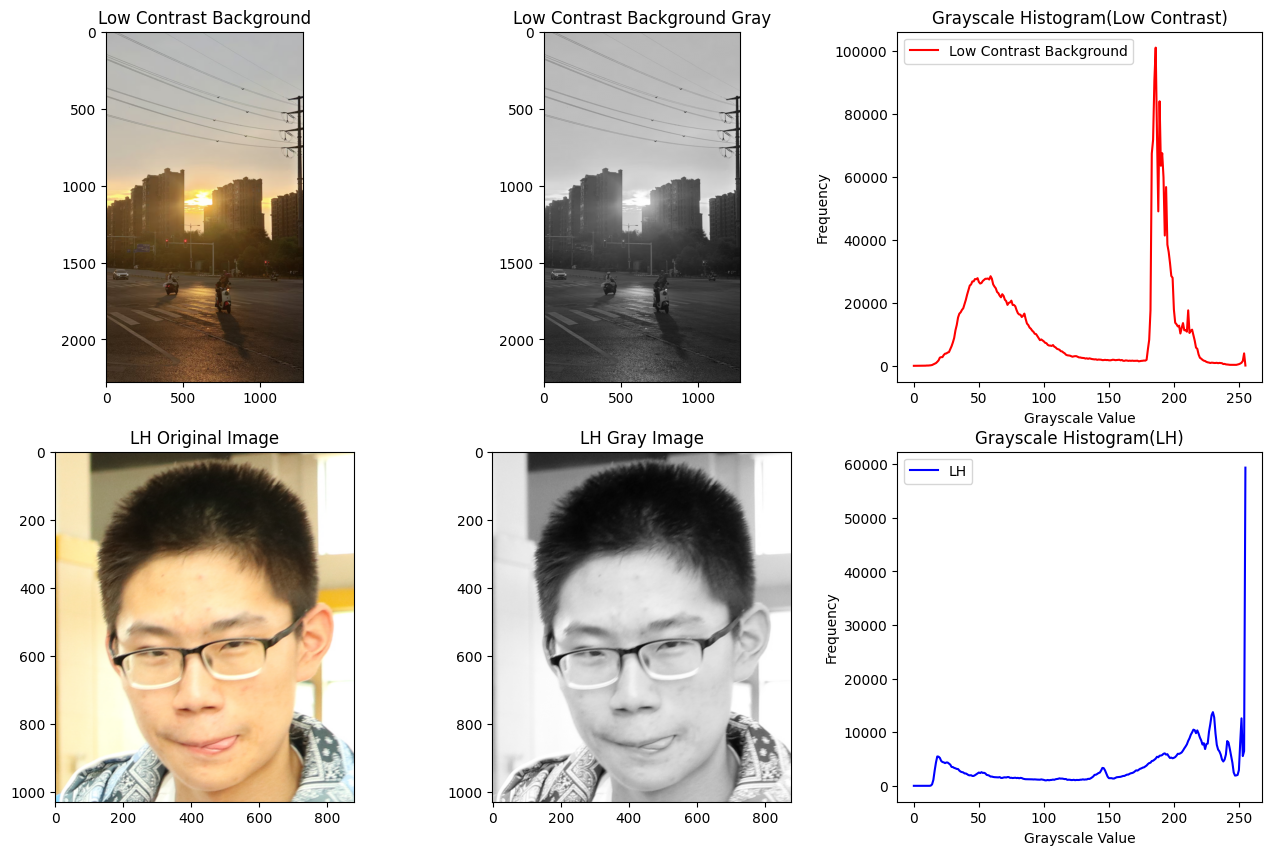

In [463]:
#直方图显示
import cv2
import matplotlib.pyplot as plt
import numpy as np

#读取照片
lh_img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/lh.png'
low_contrast_background_img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/low_contrast_background.jpg'
img_lh = cv2.imread(lh_img_path)
img_low_contrast_background = cv2.imread(low_contrast_background_img_path)

#转换为灰度图像
img_lh_gray = cv2.cvtColor(img_lh, cv2.COLOR_BGR2GRAY)
img_low_contrast_background_gray = cv2.cvtColor(img_low_contrast_background, cv2.COLOR_BGR2GRAY)

#计算并显示两个直方图的对比
#计算图像灰度直方图的函数cv2.calcHist(images, channels, mask, histSize, pixel_ranges).返回的是一维数组, 不能用imshow(二维图像数组)
hist_img_lh_gray = cv2.calcHist([img_lh_gray], [0], None, [256], [0, 256])
hist_img_low_contrast_background_gray = cv2.calcHist([img_low_contrast_background_gray], [0], None, [256], [0, 256])

img_low_contrast_background = cv2.cvtColor(img_low_contrast_background, cv2.COLOR_BGR2RGB)
img_lh = cv2.cvtColor(img_lh, cv2.COLOR_BGR2RGB)
#显示图像
fig, ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].imshow(img_low_contrast_background)
ax[0,0].set_title('Low Contrast Background')

ax[0,1].imshow(img_low_contrast_background_gray, cmap = 'gray')
ax[0,1].set_title('Low Contrast Background Gray')

ax[0,2].plot(hist_img_low_contrast_background_gray, color='red', label = 'Low Contrast Background')
ax[0,2].set_xlabel('Grayscale Value')
ax[0,2].set_ylabel('Frequency')
ax[0,2].set_title('Grayscale Histogram(Low Contrast)')
ax[0,2].legend()

ax[1,0].imshow(img_lh)
ax[1,0].set_title('LH Original Image')

ax[1,1].imshow(img_lh_gray, cmap = 'gray')
ax[1,1].set_title('LH Gray Image')

ax[1,2].plot(hist_img_lh_gray, color='blue', label = 'LH')
ax[1,2].set_xlabel('Grayscale Value')
ax[1,2].set_ylabel('Frequency')
ax[1,2].set_title('Grayscale Histogram(LH)')
ax[1,2].legend()

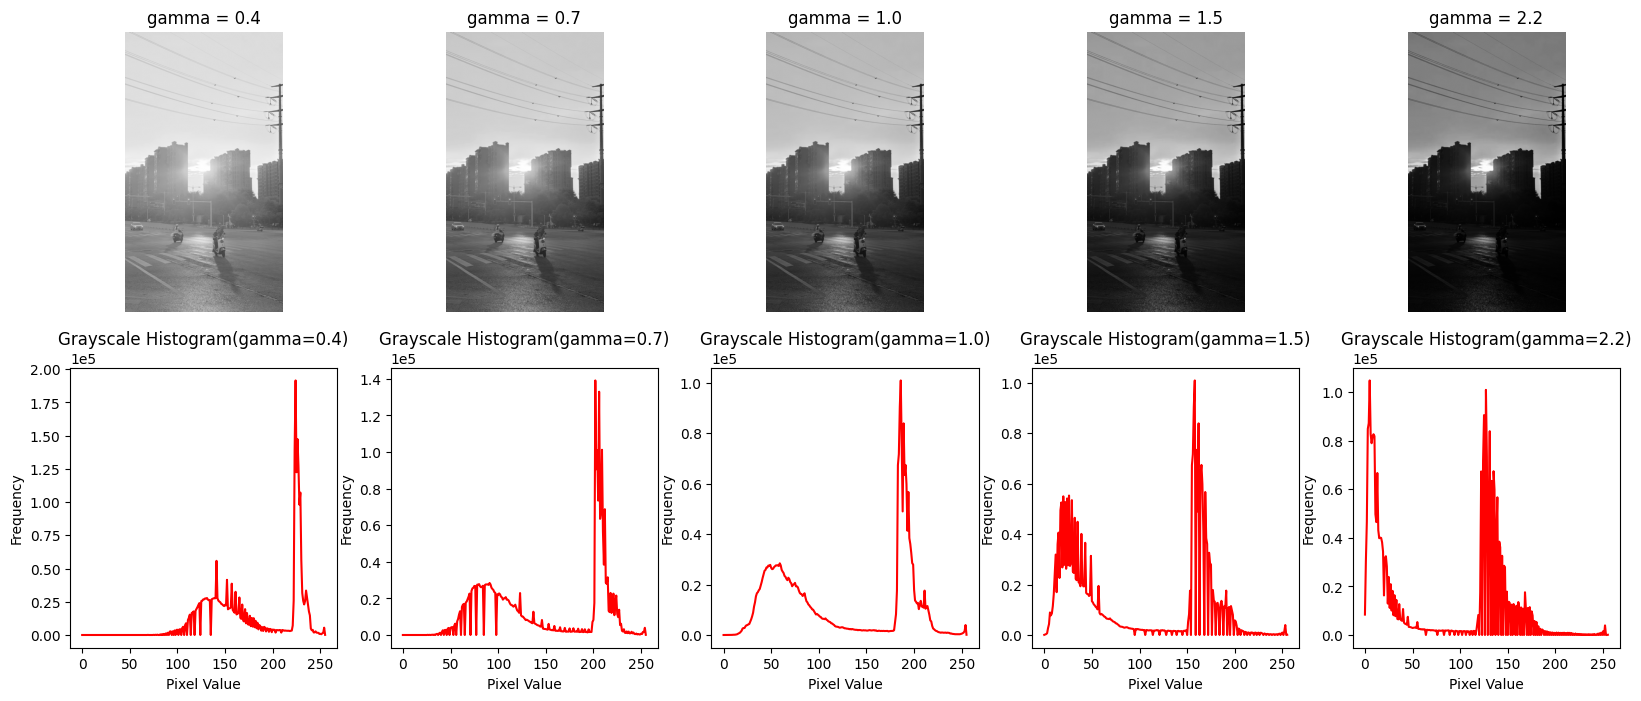

In [464]:
#幂律（伽马）变换
import cv2
import numpy as np
import matplotlib.pyplot

low_contrast_background_img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/low_contrast_background.jpg'
img_low_contrast_background = cv2.imread(low_contrast_background_img_path)
img_low_contrast_background_gray = cv2.cvtColor(img_low_contrast_background, cv2.COLOR_BGR2GRAY)
#参数设置
gamma_list = [0.4, 0.7, 1.0, 1.5, 2.2]
c = 1.0
n_cols = len(gamma_list) #gamma列表列数
#归一化到 [0,1] 再做幂律变换
img_one = img_low_contrast_background_gray.astype(np.float32)/255.0 #uint8-->float255

fig, ax = plt.subplots(2, n_cols, figsize=(4*n_cols, 8))
#进行幂律变换
for i, j in enumerate(gamma_list): #i接收下标，j接收对应列表值
    s = c * img_one ** j
    s_uint8 = np.clip(s * 255, 0, 255).astype(np.uint8) #使用clip做截断后转换uint8
    #直方图
    hist = cv2.calcHist([s_uint8], [0], None, [256], [0,256])
    
    ax[0, i].imshow(s_uint8, cmap='gray')
    ax[0, i].set_title(f'gamma = {j}')
    ax[0, i].axis('off')

    ax[1, i].plot(hist, color='red')
    ax[1, i].ticklabel_format(style='scientific', axis='y', scilimits=(0,0)) #使用科学计数法
    ax[1, i].set_xlabel('Pixel Value')
    ax[1, i].set_ylabel('Frequency')
    ax[1, i].set_title(f'Grayscale Histogram(gamma={j})')

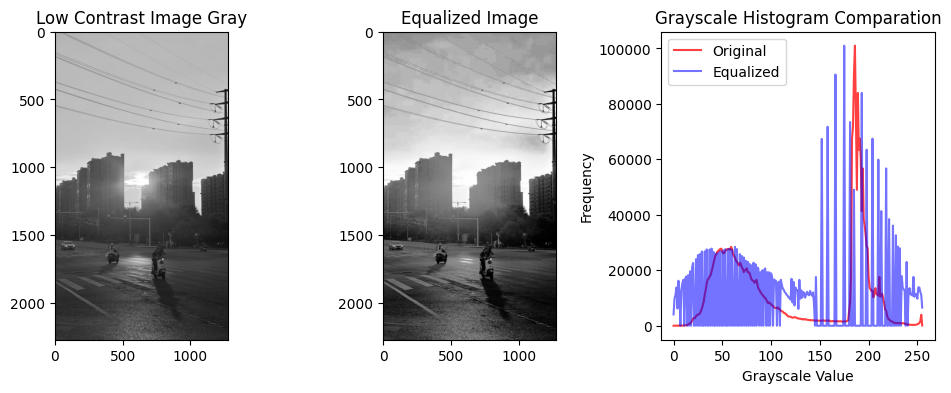

In [465]:
#灰度直方图均衡化
import cv2
import matplotlib.pyplot as plt
import numpy as np

#读取照片
low_contrast_background_img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/low_contrast_background.jpg'
img_low_contrast_background = cv2.imread(low_contrast_background_img_path)

#转换为灰度图像
img_low_contrast_background_gray = cv2.cvtColor(img_low_contrast_background, cv2.COLOR_BGR2GRAY)
#计算原灰度图像的直方图
hist_img_low_contrast_background_gray = cv2.calcHist([img_low_contrast_background_gray], [0], None, [256], [0, 256])

#直方图均衡化指令
equalized_img_low_contrast_background_gray = cv2.equalizeHist(img_low_contrast_background_gray) #输出为图像
#均衡化后直方图计算
hist_equalized_img_low_contrast_background_gray = cv2.calcHist([equalized_img_low_contrast_background_gray], [0], None, [256], [0, 256]) #输出为数组

fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(img_low_contrast_background_gray, cmap='gray')
ax[0].set_title('Low Contrast Image Gray')
ax[1].imshow(equalized_img_low_contrast_background_gray, cmap='gray')
ax[1].set_title('Equalized Image')

ax[2].plot(hist_img_low_contrast_background_gray, color='red', label='Original', alpha=0.75)
ax[2].plot(hist_equalized_img_low_contrast_background_gray, color='blue', label='Equalized', alpha=0.55)
ax[2].set_title('Grayscale Histogram Comparation')
ax[2].set_xlabel('Grayscale Value')
ax[2].set_ylabel('Frequency')
ax[2].legend()

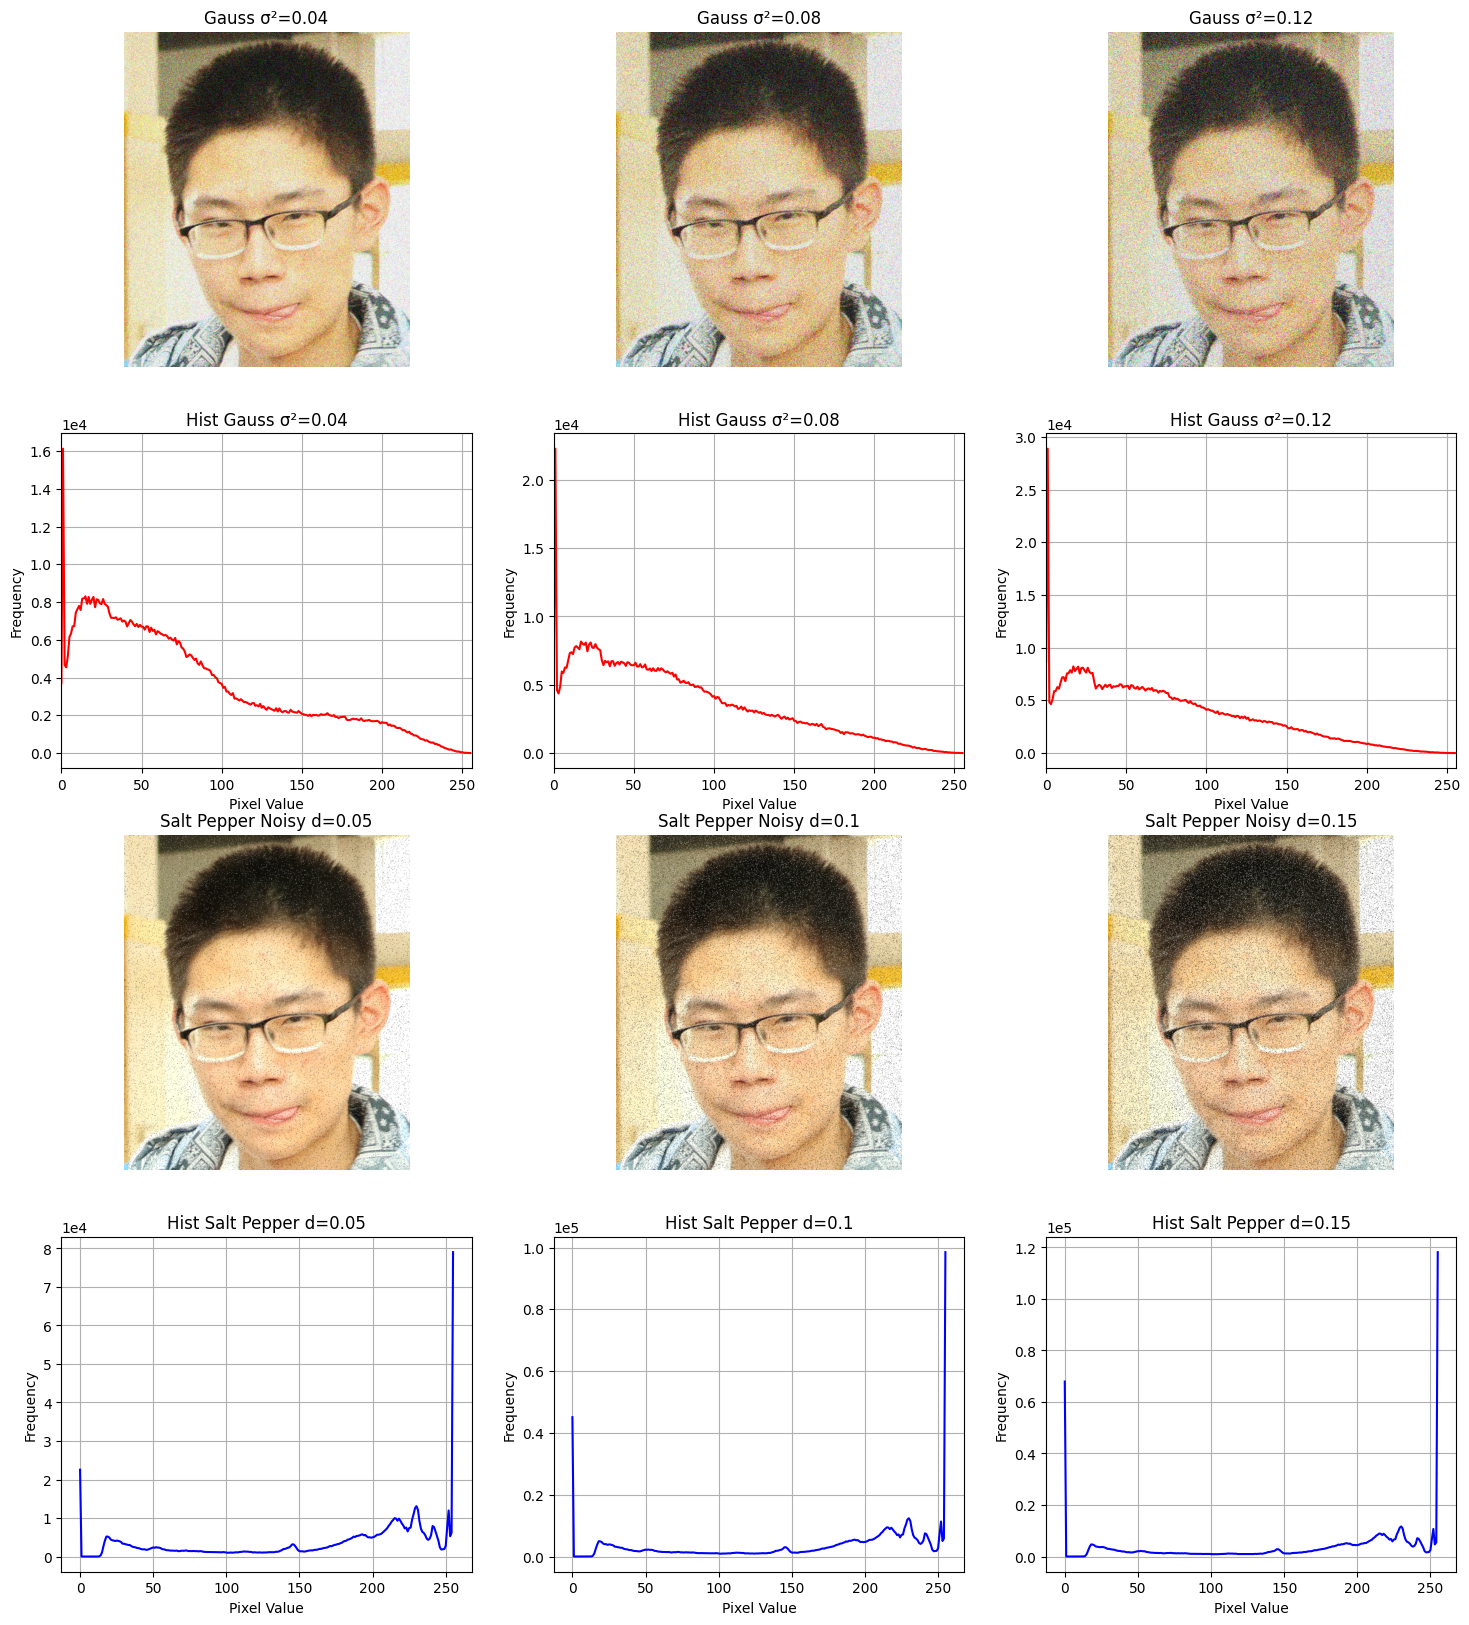

In [466]:
#图像加噪
#高斯噪声-->调节方差，椒盐噪声-->调节密度
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path_lh = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/lh.png'
img_lh = cv2.imread(img_path_lh)

gauss_var_list = [0.04, 0.08, 0.12] #高斯噪声方差
salt_pepper_density_list = [0.05, 0.10, 0.15] #椒盐噪声密度
Height, Width, Channels = img_lh.shape

#高斯加噪函数
def add_gauss_noise(img, var):
    #img=图像，var=方差
    sigma = np.sqrt(var)
    gauss = np.random.normal(0, sigma, img.shape) #均值默认为0
    noisy = img + gauss
    return (np.clip(noisy, 0, 1)*255).astype(np.uint8)

#椒盐加噪函数
def add_salt_pepper_noise(img, density):
    #density=椒盐点占像素点总比例
    noisy = img.copy() #在复制图上进行调整
    #随机数椒盐掩膜
    mask = np.random.rand(Height, Width) #生成 0–1 之间的随机矩阵
    salt = mask < density / 2 #白点
    pepper = mask > 1 - density / 2 #黑点
    noisy[salt] = 1
    noisy[pepper] = 0
    return (np.clip(noisy, 0, 1)*255).astype(np.uint8)

#对原图像加噪前要将灰度图像归一化
img_one = img_lh.astype(np.float32)/255.0

#找出最大列数 方便进行图像绘制
n_gauss = len(gauss_var_list)
n_salt_pepper = len(salt_pepper_density_list)
cols = max(n_gauss, n_salt_pepper)

fig, ax = plt.subplots(4, cols, figsize=(6*cols, 20))
img_one = cv2.cvtColor(img_one, cv2.COLOR_BGR2RGB)
#高斯噪声图像
for i, var in enumerate(gauss_var_list):
    noisy = add_gauss_noise(img_one, var)
    ax[0, i].imshow(noisy)
    ax[0, i].set_title(f'Gauss σ²={var}')
    ax[0, i].axis('off')
#高斯噪声直方图（灰度)
for i, var in enumerate(gauss_var_list):
    noisy_rgb = add_gauss_noise(img_one, var)
    noisy_gray = cv2.cvtColor((noisy_rgb*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([noisy_gray], [0], None, [256], [0, 256])
    ax[1, i].plot(hist, color='red')
    ax[1, i].ticklabel_format(style='scientific', axis='y', scilimits=(0,0)) #使用科学计数法
    ax[1, i].set_xlabel('Pixel Value')
    ax[1, i].set_ylabel('Frequency')
    ax[1, i].set_title(f'Hist Gauss σ²={var}')
    ax[1, i].set_xlim([0, 256])
    ax[1, i].grid(True)
#椒盐噪声图像
for i, density in enumerate(salt_pepper_density_list):
    noisy = add_salt_pepper_noise(img_one, density)
    ax[2, i].imshow(noisy)
    ax[2, i].set_title(f'Salt Pepper Noisy d={density}')
    ax[2, i].axis('off')
#椒盐噪声直方图
for i, density in enumerate(salt_pepper_density_list):
    noisy_rgb = add_salt_pepper_noise(img_one, density)
    noisy_gray = cv2.cvtColor(noisy_rgb, cv2.COLOR_RGB2GRAY)
    hist = cv2.calcHist([noisy_gray], [0], None, [256], [0,256])
    ax[3, i].plot(hist, color='blue')
    ax[3, i].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax[3, i].set_xlabel('Pixel Value')
    ax[3, i].set_ylabel('Frequency')
    ax[3, i].set_title(f'Hist Salt Pepper d={density}')
    ax[3, i].grid(True)

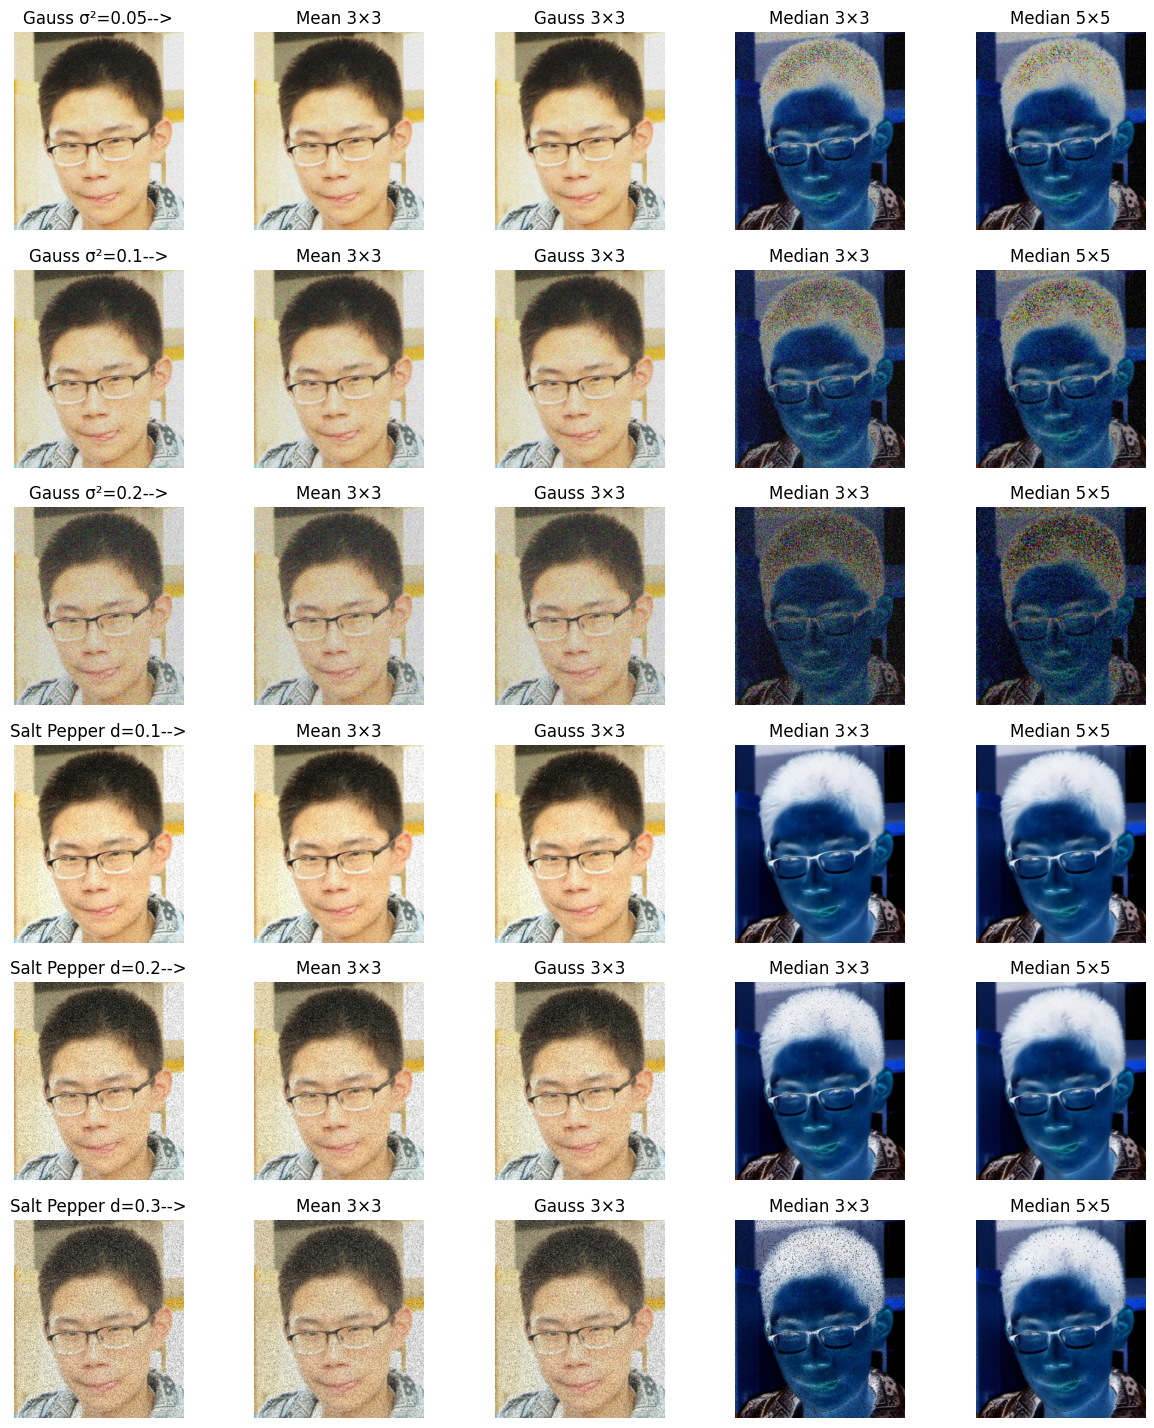

In [467]:
#滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/lh.png'
img_lh = cv2.imread(img_path)
img_lh = cv2.cvtColor(img_lh, cv2.COLOR_BGR2RGB)

gauss_var_list = [0.05, 0.10, 0.20] #高斯噪声方差
salt_pepper_density_list = [0.10, 0.20, 0.30] #椒盐密度
ksize = [3, 5] #滤波核尺寸
sigma_G = {3: 0.8, 5: 1.2} #高斯滤波 σ 经验值（Key=核尺寸，Value=对应σ）

#高斯加噪函数
def add_gauss_noise(img, var):
    #img=图像，var=方差
    sigma = np.sqrt(var)
    gauss = np.random.normal(0, sigma, img.shape) #均值默认为0
    noisy = img + gauss
    return (np.clip(noisy, 0, 1)*255).astype(np.uint8)

#椒盐加噪函数
def add_salt_pepper_noise(img, density):
    #density=椒盐点占像素点总比例
    noisy = img.copy() #在复制图上进行调整
    #随机数椒盐掩膜
    Height, Width = noisy.shape[:2]
    mask = np.random.rand(Height, Width) #生成 0–1 之间的随机矩阵
    salt = mask < density / 2 #白点
    pepper = mask > 1 - density / 2 #黑点
    noisy[salt] = 1
    noisy[pepper] = 0
    return (np.clip(noisy, 0, 1)*255).astype(np.uint8)

#定义三种滤波函数（简化代码书写）
def manual_mean(img, k): #均值滤波
    return cv2.blur(img, (k, k))
def manual_gauss(img, k): #高斯滤波
    return cv2.GaussianBlur(img, (k, k), sigma_G[k])
def manual_median(img, k): #中值滤波
    return cv2.medianBlur((img*255).astype(np.uint8), k).astype(np.float32)/255

img_one = img_lh.astype(np.float32)/255 #归一化

fig, ax = plt.subplots(6, 5, figsize=(15, 18))
ax = ax.reshape(-1, 5) #行数自动计算，列数固定为5

row = -1
#高斯噪声组
for i, var in enumerate(gauss_var_list):
    row += 1
    noisy = add_gauss_noise(img_one, var)
    ax[row, 0].imshow(noisy)
    ax[row, 0].set_title(f'Gauss σ²={var}-->')
    ax[row, 0].axis('off')
    # 3×3 滤波
    ax[row, 1].imshow(manual_mean(noisy, 3))
    ax[row, 1].set_title('Mean 3×3')
    ax[row, 1].axis('off')
    ax[row, 2].imshow(manual_gauss(noisy, 3))
    ax[row, 2].set_title('Gauss 3×3'), ax[row, 2].axis('off')
    ax[row, 3].imshow(manual_median(noisy, 3))
    ax[row, 3].set_title('Median 3×3')
    ax[row, 3].axis('off')
    # 5×5 滤波
    ax[row, 4].imshow(manual_median(noisy, 5))
    ax[row, 4].set_title('Median 5×5')
    ax[row, 4].axis('off')
#椒盐噪声组
for i, density in enumerate(salt_pepper_density_list):
    row += 1
    noisy = add_salt_pepper_noise(img_one, density)
    ax[row, 0].imshow(noisy)
    ax[row, 0].set_title(f'Salt Pepper d={density}-->')
    ax[row, 0].axis('off')
    ax[row, 1].imshow(manual_mean(noisy, 3))
    ax[row, 1].set_title('Mean 3×3')
    ax[row, 1].axis('off')
    ax[row, 2].imshow(manual_gauss(noisy, 3))
    ax[row, 2].set_title('Gauss 3×3')
    ax[row, 2].axis('off')
    ax[row, 3].imshow(manual_median(noisy, 3))
    ax[row, 3].set_title('Median 3×3')
    ax[row, 3].axis('off')
    ax[row, 4].imshow(manual_median(noisy, 5))
    ax[row, 4].set_title('Median 5×5')
    ax[row, 4].axis('off')

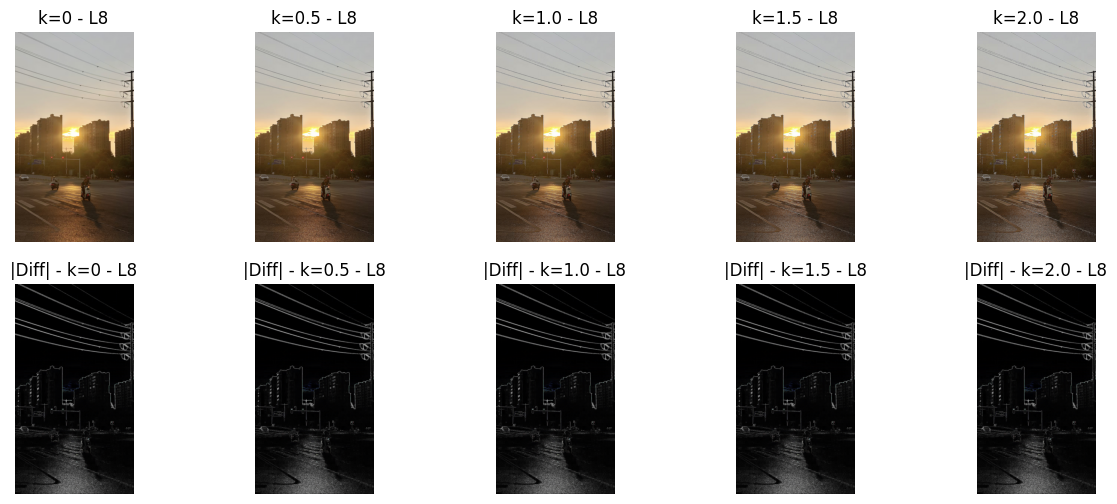

In [468]:
#拉普拉斯算子锐化
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/low_contrast_background.jpg'
img_lh = cv2.imread(img_path)
img = cv2.cvtColor(img_lh, cv2.COLOR_BGR2RGB)

#两种常用拉普拉斯核（4邻域与8邻域）
lap_kernels = {
    'L4': np.array([[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]], np.float32),
    'L8': np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]], np.float32)}
k_list = [0, 0.5, 1.0, 1.5, 2.0] #锐化值

fig, ax = plt.subplots(2, 5, figsize=(15, 6))
img_one = img.astype(np.float32)/255.0 #归一化

for i, k in enumerate(k_list):
    lap = cv2.filter2D(img, cv2.CV_32F, lap_kernels['L8']) #卷积函数，输出图像深度为float32，L8核
    #锐化公式：O = I + k * Lap
    sharp = np.clip(img + k * lap, 0, 255).astype(np.uint8)
    ax[0, i].imshow(sharp)
    ax[0, i].set_title(f'k={k} - L8')
    ax[0, i].axis('off')

for i, k in enumerate(k_list):
    lap = cv2.filter2D(img, cv2.CV_32F, lap_kernels['L8'])
    diff = np.clip(np.abs(lap), 0, 255).astype(np.uint8)
    ax[1, i].imshow(diff, cmap='gray')
    ax[1, i].set_title(f'|Diff| - k={k} - L8')
    ax[1, i].axis('off')

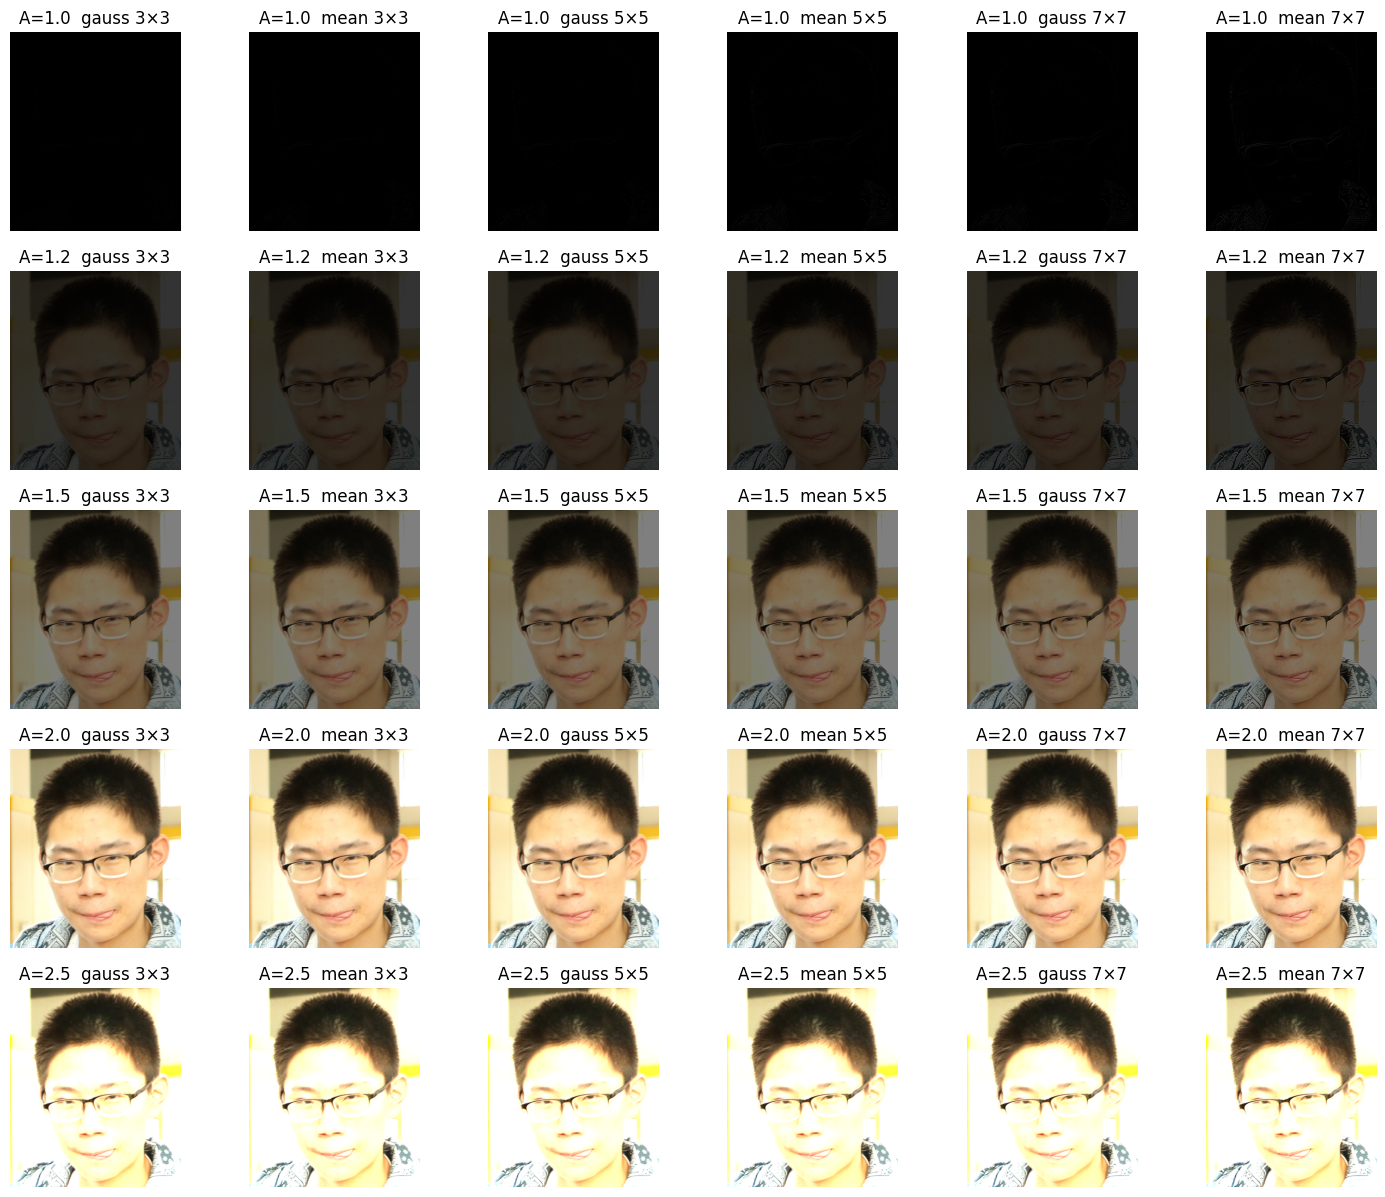

In [469]:
#高提升滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/lh.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#归一化
img_one = img.astype(np.float32) / 255.0
A_list      = [1.0, 1.2, 1.5, 2.0, 2.5] #提升系数
lpf_type    = ['gauss','mean']
lpf_ksize   = [3, 5, 7] #低通核尺寸
sigma_G     = {3: 0.8, 5: 1.0, 7: 1.5} #高斯σ经验值

#定义低通函数
def lpf(img, k, mode):
    if mode == 'mean':
        return cv2.blur(img, (k, k))
    else: 
        return cv2.GaussianBlur(img, (k, k), sigma_G[k])
#高提升滤波函数
def high_boost(img, A, k, mode):
    smooth = lpf(img, k, mode)
    boost = A * img - smooth
    return np.clip(boost, 0, 1)

n_col = len(lpf_ksize) * 2          # 3×2 = 6 列
fig, ax = plt.subplots(len(A_list), n_col,
                       figsize=(3 * n_col, 3 * len(A_list)))

for i, A in enumerate(A_list):
    for j, k in enumerate(lpf_ksize):
        for l, mode in enumerate(lpf_type):          # l=0→gauss, l=1→mean
            col = j * 2 + l                          # 列序号：0 1  2 3  4 5
            out = high_boost(img_one, A, k, mode)
            ax[i, col].imshow(out)
            ax[i, col].set_title(f'A={A}  {mode} {k}×{k}')
            ax[i, col].axis('off')

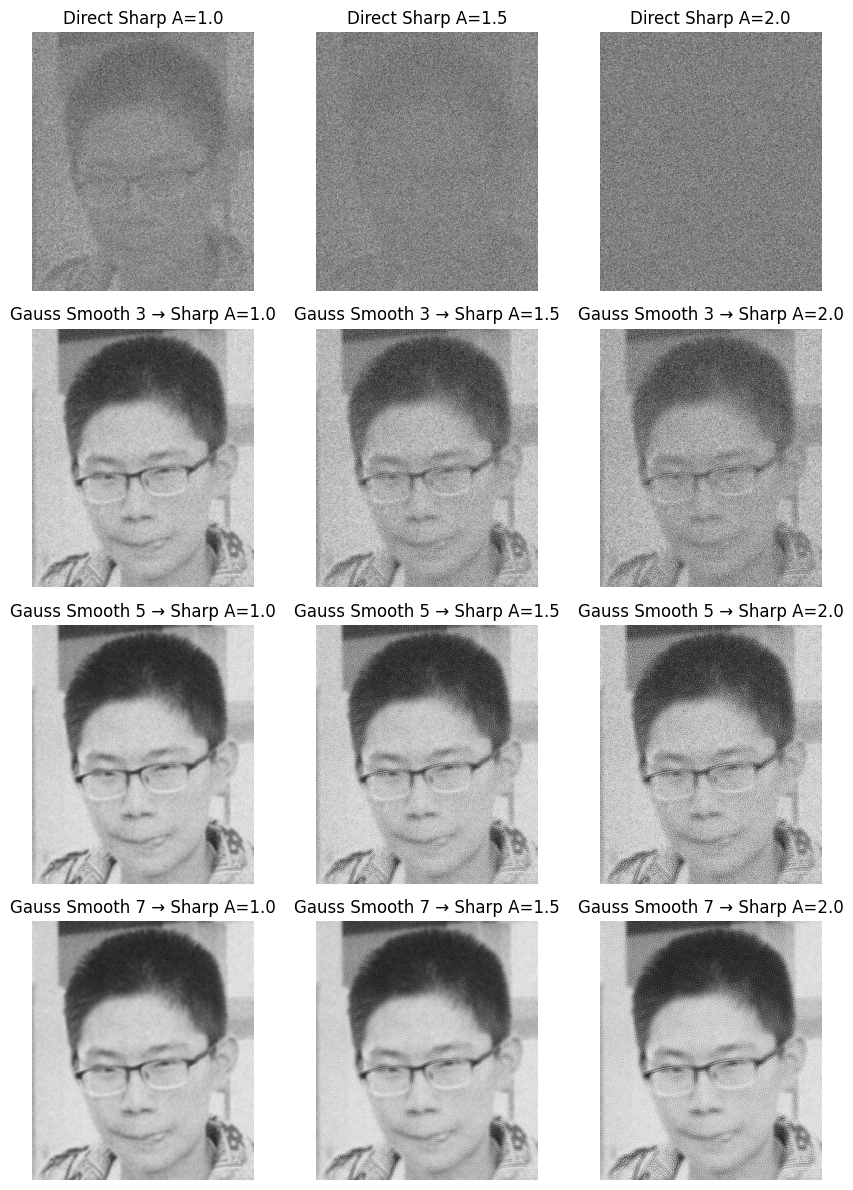

In [470]:
#锐化与噪声的权衡
#加噪 → 直接拉普拉斯锐化 → 先高斯平滑再锐化 → 可视化
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/Users/guo2006/myenv/Machine Vision Experiment/Machine Vision Experiment 2/lh.png'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_one = img.astype(np.float32) / 255.0 #归一化

noise_var = 0.10 #明显高斯噪声
smooth_k  = [3, 5, 7] #平滑核
smooth_sig = {3: 0.8, 5: 1.0, 7: 1.5} #平滑高斯sigma值
sharp_amp = [1.0, 1.5, 2.0] #锐化系数 A

#加噪
noise = np.random.normal(0, np.sqrt(noise_var), img_one.shape).astype(np.float32)
noisy = np.clip(img_one + noise, 0, 1)

#工具函数
def laplacian_sharp(src, A):
    """灰度 Laplacian 锐化（高提升）"""
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY) #单通道灰度图像
    lap  = cv2.Laplacian(gray, cv2.CV_32F, ksize=3) #拉普拉斯边缘检测函数ksize-->卷积核尺寸（奇数）
    sharp = np.clip(gray + A * lap, 0, 1)
    return cv2.cvtColor(sharp, cv2.COLOR_GRAY2RGB) #返回彩色图给imshow

def gauss_smooth(src, k):
    return cv2.GaussianBlur(src, (k, k), smooth_sig[k])

n_sharp = len(sharp_amp)
fig, ax = plt.subplots(len(smooth_k) + 1, n_sharp,figsize=(3 * n_sharp, 3 * (len(smooth_k) + 1)))

#直接锐化（无平滑）
for j, A in enumerate(sharp_amp):
    out = laplacian_sharp(noisy, A)
    ax[0, j].imshow(out)
    ax[0, j].set_title(f'Direct Sharp A={A}')
    ax[0, j].axis('off')

#先平滑再锐化
for i, k in enumerate(smooth_k):
    smoothed = gauss_smooth(noisy, k)
    for j, A in enumerate(sharp_amp):
        out = laplacian_sharp(smoothed, A)
        ax[i + 1, j].imshow(out)
        ax[i + 1, j].set_title(f'Gauss Smooth {k} → Sharp A={A}')
        ax[i + 1, j].axis('off')

plt.tight_layout()
plt.show()